In [1]:
!pip install kaggle


In [2]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
usa-real-estate-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
import pandas as pd
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
df = pd.read_csv('realtor-data.zip.csv')

In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [7]:
len(df)

df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [8]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [9]:
df_cleaned = df.dropna()

In [10]:
len(df_cleaned)

1354105

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1354105 entries, 0 to 2226381
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   brokered_by  1354105 non-null  float64
 1   status       1354105 non-null  object 
 2   price        1354105 non-null  float64
 3   bed          1354105 non-null  float64
 4   bath         1354105 non-null  float64
 5   acre_lot     1354105 non-null  float64
 6   street       1354105 non-null  float64
 7   city         1354105 non-null  object 
 8   state        1354105 non-null  object 
 9   zip_code     1354105 non-null  float64
 10  house_size   1354105 non-null  float64
dtypes: float64(8), object(3)
memory usage: 124.0+ MB


In [82]:

df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'], 
                                    bins=[0, 500000, 1000000, 2000000, 5000000, np.inf],
                                    labels=['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury'])

desired_locations = {
    'Las Vegas': 'Nevada',
    'Miami': 'Florida',
    'Hawaii': 'Hawaii'
}

df_tourist = df_cleaned[df_cleaned.apply(lambda row: (row['city'] == 'Las Vegas' and row['state'] == 'Nevada') or
                                                 (row['city'] == 'Miami' and row['state'] == 'Florida') or
                                                 (row['state'] == 'Hawaii'), axis=1)]

df_tourist.reset_index(drop=True, inplace=True)
# Now df_tourist contains only rows where:
# - 'city' is 'Las Vegas' and 'state' is 'Nevada'
# - OR 'city' is 'Miami' and 'state' is 'Florida'
# - OR 'state' is 'Hawaii' (regardless of city)



C:\Users\Dell\AppData\Local\Temp\ipykernel_5988\3289096098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],


In [83]:
df_tourist = df_tourist[['city','state','house_size','bed','bath','price','PriceSegment']]
df_tourist

,city,state,house_size,bed,bath,price,PriceSegment
0,Miami,Florida,5693.0,8.0,6.0,1459999.0,High-end
1,Miami,Florida,3408.0,5.0,5.0,798721.0,Mid-range
2,Miami,Florida,1273.0,3.0,2.0,405000.0,Affordable
3,Miami,Florida,1794.0,3.0,3.0,550000.0,Mid-range
4,Miami,Florida,1506.0,4.0,2.0,430000.0,Affordable
...,...,...,...,...,...,...,...
9544,Wailuku,Hawaii,4640.0,8.0,5.0,1200000.0,High-end
9545,Wailuku,Hawaii,1581.0,3.0,3.0,1150000.0,High-end
9546,Wailuku,Hawaii,1424.0,5.0,2.0,749000.0,Mid-range
9547,Wailuku,Hawaii,1645.0,3.0,2.0,1280000.0,High-end


In [84]:
con = sqlite3.connect('AmericaHouse.db')
cur = con.cursor()

In [85]:
%load_ext sql 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [86]:
%sql sqlite:///AmericaHouse.db

In [87]:
df_tourist.to_sql('CityArea',con,if_exists = 'replace',index = False)

9549

In [88]:
%%sql 
SELECT *
FROM CityArea
WHERE [price] >= 1000000

 * sqlite:///AmericaHouse.db
Done.


city,state,house_size,bed,bath,price,PriceSegment
Miami,Florida,5693.0,8.0,6.0,1459999.0,High-end
Miami,Florida,1766.0,3.0,2.0,1249999.0,High-end
Miami,Florida,2460.0,4.0,3.0,1099000.0,High-end
Miami,Florida,5026.0,6.0,4.0,2900000.0,Luxury
Miami,Florida,3508.0,5.0,5.0,1579000.0,High-end
Miami,Florida,8906.0,7.0,9.0,7990000.0,Ultra-Luxury
Miami,Florida,3327.0,4.0,4.0,1100000.0,High-end
Miami,Florida,5976.0,6.0,7.0,5580000.0,Ultra-Luxury
Miami,Florida,6045.0,6.0,7.0,2500000.0,Luxury
Miami,Florida,4337.0,4.0,5.0,2150000.0,Luxury


In [89]:
con.close()

# Phân tích giá nhà tại các khu vực thành phố lớn

In [90]:
stats = df_tourist.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tổng quát cho giá bất động sản
       house_size     bed    bath        price
count     9549.00 9549.00 9549.00      9549.00
mean      4128.71    3.35    2.67   1164023.29
std      38682.22    1.73    1.81   2609864.26
min        125.00    1.00    1.00      2500.00
25%       1196.00    3.00    2.00    444000.00
50%       1671.00    3.00    2.00    640000.00
75%       2427.00    4.00    3.00   1050000.00
max     927828.00   99.00  113.00 150000000.00


In [91]:
# Độ biến thiên giá theo khu vực
price_variance_by_location = df_tourist.groupby('state')['price'].var()

print(price_variance_by_location.to_string(float_format='{:.2f}'.format))

state
Florida   10045894711465.18
Hawaii     7180426625731.22
Nevada     1408758952776.65


In [92]:
# Số lượng bất động sản theo khu vực

count_by_city = df['city'].value_counts()
count_by_city

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [93]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_tourist['price'].std() / df_tourist['price'].mean()
cv

2.2421065601712677

In [94]:
# Độ phân tán giá
price_range = df_tourist['price'].max() - df_tourist['price'].min()

price_range

149997500.0

In [95]:
dem = df_tourist['state'].value_counts()
dem

state
Hawaii     4044
Florida    3180
Nevada     2325
Name: count, dtype: int64

In [96]:
Q1 = df_tourist['price'].quantile(0.25)
Q3 = df_tourist['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_tourist[(df_tourist['price'] < (Q1 - 1.5 * IQR)) | (df_tourist['price'] > (Q3 + 1.5 * IQR))]

outliers

,city,state,house_size,bed,bath,price,PriceSegment
13,Miami,Florida,5026.0,6.0,4.0,2900000.0,Luxury
23,Miami,Florida,8906.0,7.0,9.0,7990000.0,Ultra-Luxury
28,Miami,Florida,5976.0,6.0,7.0,5580000.0,Ultra-Luxury
32,Miami,Florida,6045.0,6.0,7.0,2500000.0,Luxury
33,Miami,Florida,4337.0,4.0,5.0,2150000.0,Luxury
...,...,...,...,...,...,...,...
9514,Kihei,Hawaii,4845.0,5.0,6.0,5350000.0,Ultra-Luxury
9526,Paia,Hawaii,3002.0,4.0,3.0,11999000.0,Ultra-Luxury
9527,Paia,Hawaii,2990.0,4.0,3.0,6995000.0,Ultra-Luxury
9529,Kula,Hawaii,999.0,2.0,2.0,4500000.0,Luxury


In [97]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_tourist['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


917432.3507786467

In [98]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_tourist['PriceSegment'].value_counts()
frequency

PriceSegment
Mid-range       3755
Affordable      3355
High-end        1494
Luxury           681
Ultra-Luxury     264
Name: count, dtype: int64

In [99]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_tourist['price'].corr(df_tourist['house_size'])
corr_price_area

-0.00042273316345586934

In [100]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_tourist['price'].corr(df_tourist['bed'])
corr_price_bed

0.20880375166659138

In [101]:
# Hệ số tương quan giữa vùng 
mean_price_by_location = df_tourist.groupby('state')['price'].mean()
print(mean_price_by_location.to_string(float_format='{:.2f}'.format))

state
Florida    992674.06
Hawaii    1492710.53
Nevada     826681.09


In [102]:
outliers_upper = df_tourist[df_tourist['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_tourist[df_tourist['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :        city    state  house_size  bed  bath       price  PriceSegment
13    Miami  Florida      5026.0  6.0   4.0   2900000.0        Luxury
23    Miami  Florida      8906.0  7.0   9.0   7990000.0  Ultra-Luxury
28    Miami  Florida      5976.0  6.0   7.0   5580000.0  Ultra-Luxury
32    Miami  Florida      6045.0  6.0   7.0   2500000.0        Luxury
33    Miami  Florida      4337.0  4.0   5.0   2150000.0        Luxury
...     ...      ...         ...  ...   ...         ...           ...
9514  Kihei   Hawaii      4845.0  5.0   6.0   5350000.0  Ultra-Luxury
9526   Paia   Hawaii      3002.0  4.0   3.0  11999000.0  Ultra-Luxury
9527   Paia   Hawaii      2990.0  4.0   3.0   6995000.0  Ultra-Luxury
9529   Kula   Hawaii       999.0  2.0   2.0   4500000.0        Luxury
9530   Kula   Hawaii      1636.0  3.0   3.0   2700000.0        Luxury

[1036 rows x 7 columns]
Outliers lower : Empty DataFrame
Columns: [city, state, house_size, bed, bath, price, PriceSegment]
Index: []


In [103]:
price_quantiles = df_tourist['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25       444000.0
0.50       640000.0
0.70       900000.0
1.00    150000000.0
Name: price, dtype: float64

# Data Visualization

In [104]:
df_tourist.head()

,city,state,house_size,bed,bath,price,PriceSegment
0,Miami,Florida,5693.0,8.0,6.0,1459999.0,High-end
1,Miami,Florida,3408.0,5.0,5.0,798721.0,Mid-range
2,Miami,Florida,1273.0,3.0,2.0,405000.0,Affordable
3,Miami,Florida,1794.0,3.0,3.0,550000.0,Mid-range
4,Miami,Florida,1506.0,4.0,2.0,430000.0,Affordable


Text(0, 0.5, 'Giá BĐS trung bình (USD')

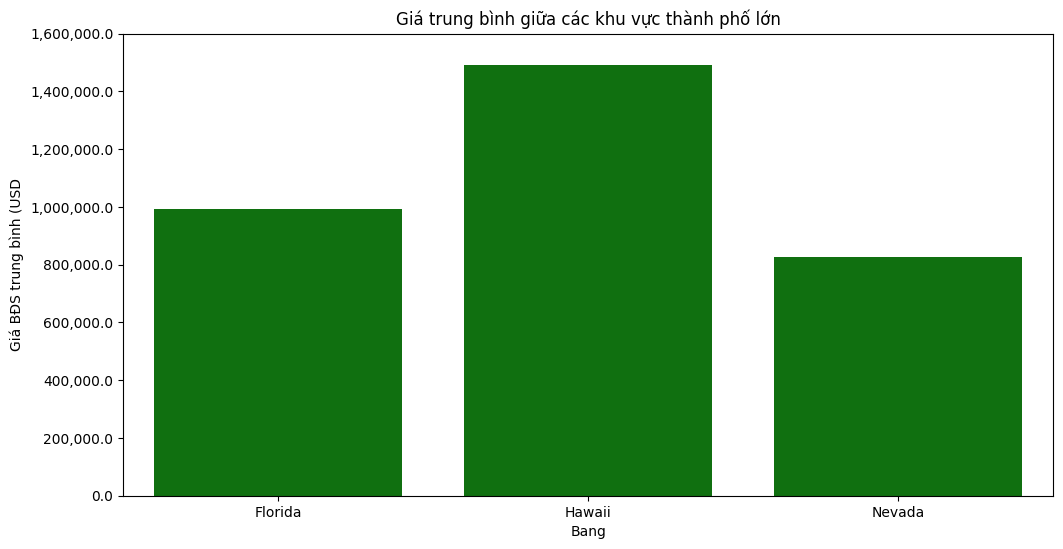

In [105]:
average_state = df_tourist.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'USD')

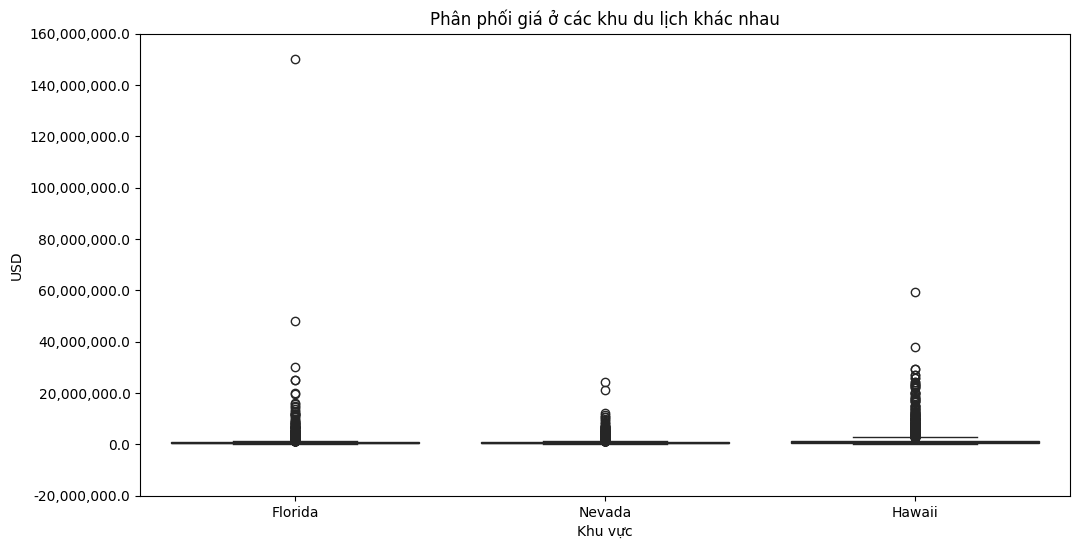

In [106]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'state', y = 'price', data = df_tourist, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('USD')

''

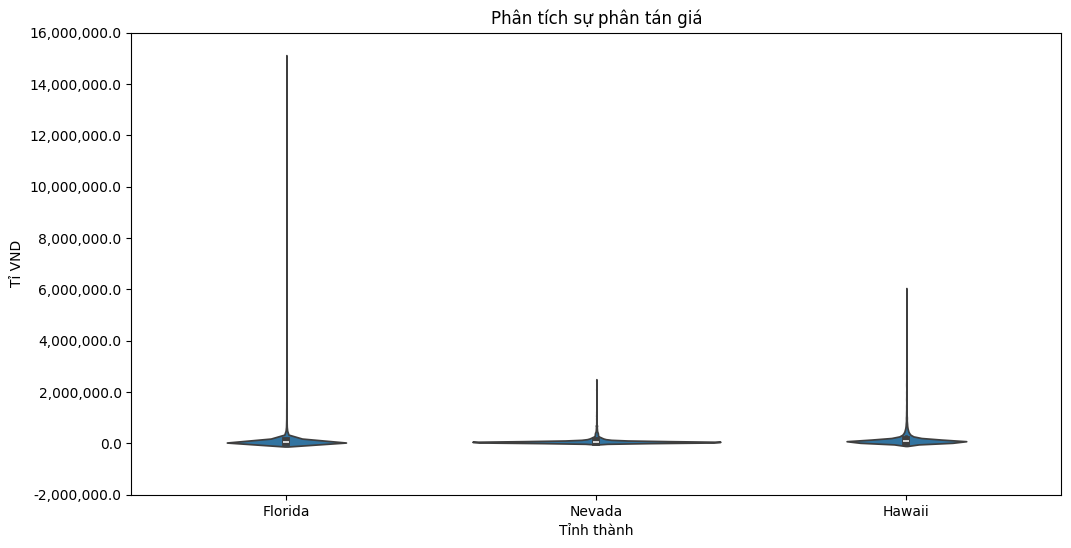

In [107]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='state', y='price', data=df_tourist)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tỉ VND')
;

Text(0, 0.5, 'Giá USD')

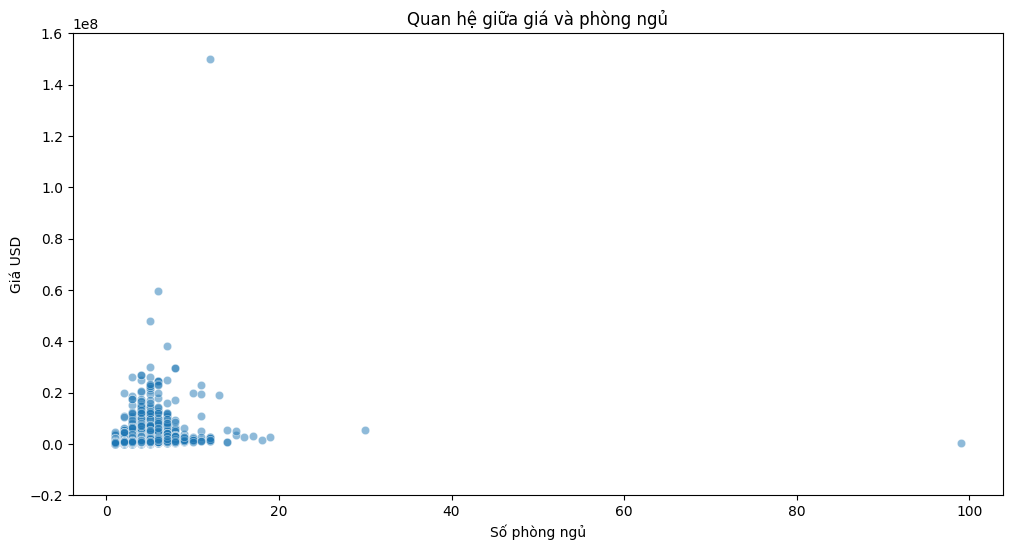

In [108]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='bed', y='price', data=df_tourist, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks,label = [f'{float(tick) / (10):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá USD')

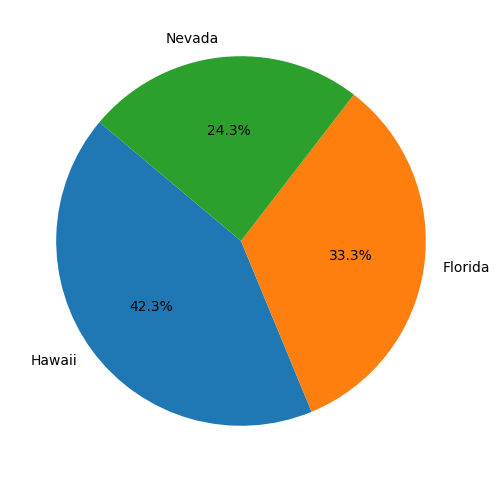

In [109]:
real_estate_counts = df_tourist['state'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct ='%1.1f%%', startangle = 140);

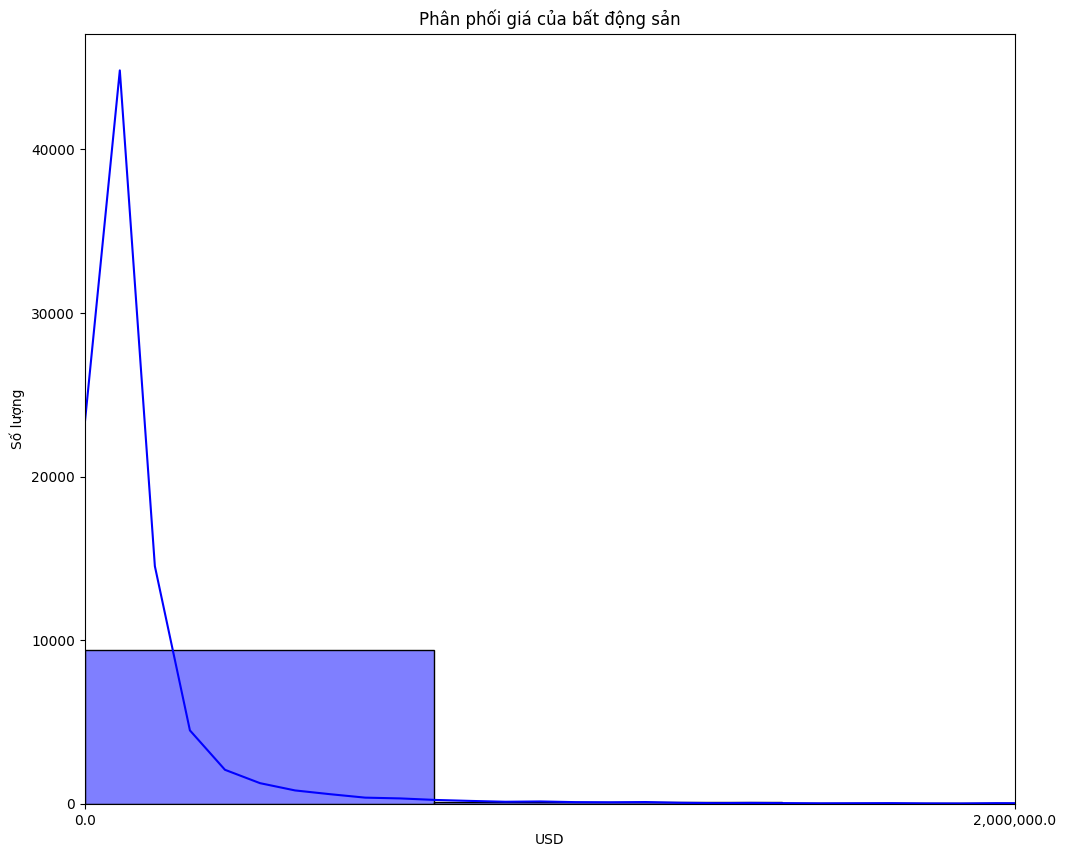

In [111]:
plt.figure(figsize=(12, 10))
sns.histplot(df_tourist['price'], kde=True, color='blue',bins = 20|)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,20000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

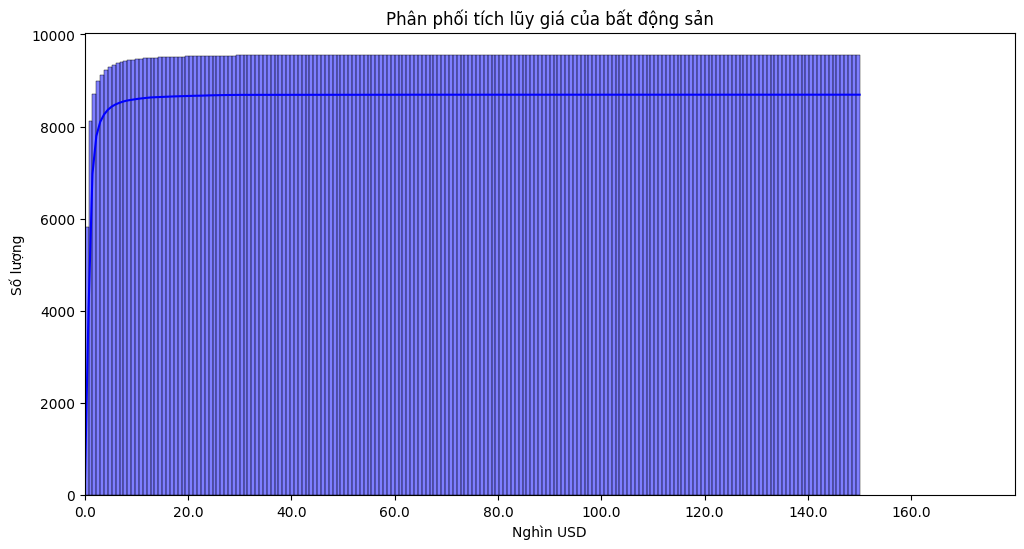

In [113]:
plt.figure(figsize=(12, 6))
sns.histplot(df_tourist['price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**5)):,.1f}' for tick in xticks])
plt.xlim(0,180000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('Nghìn USD')
plt.ylabel('Số lượng');

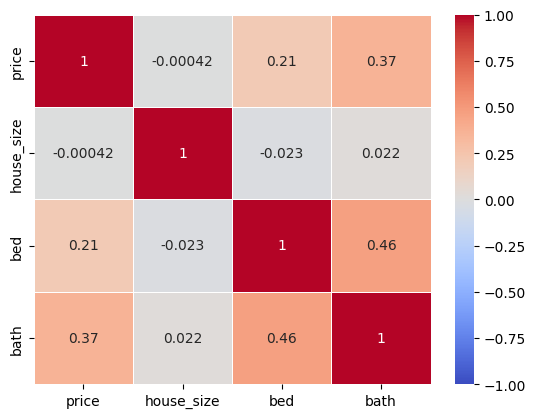

In [114]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_tourist[['price', 'house_size','bed', 'bath']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

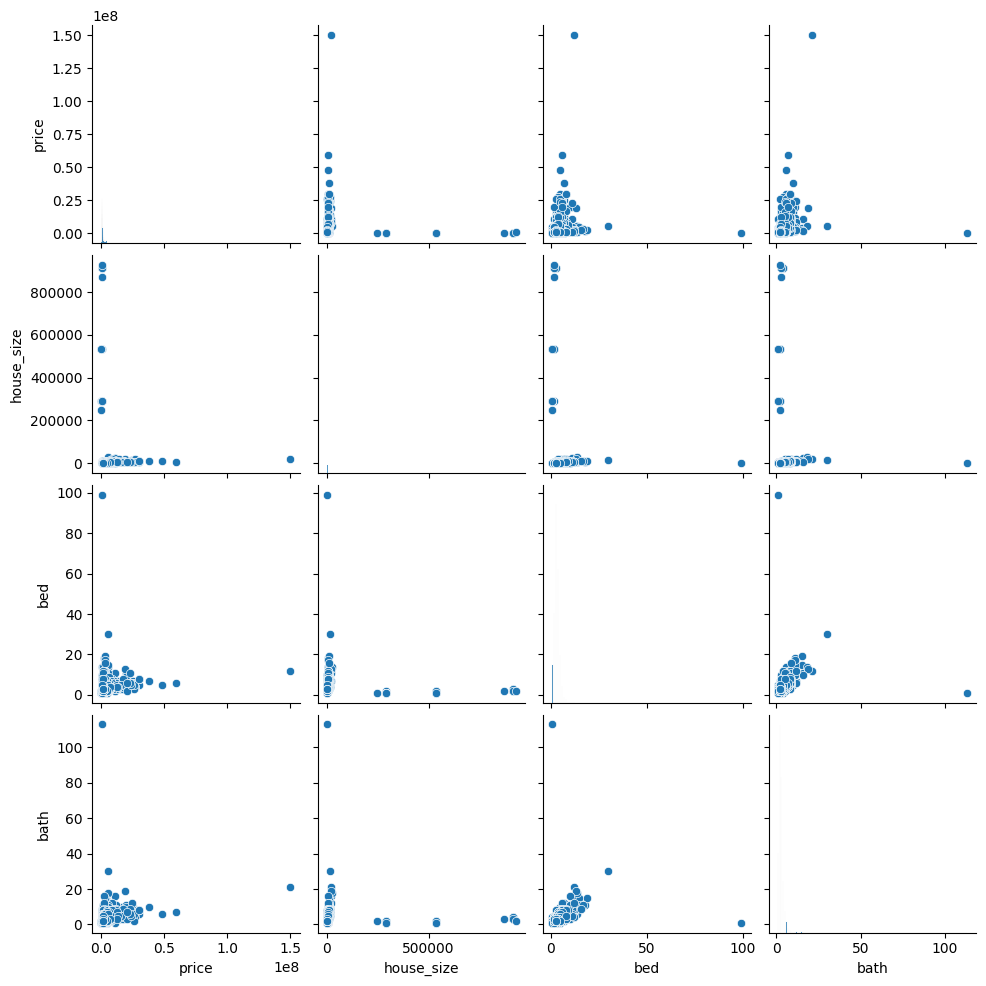

In [115]:
sns.pairplot(df_tourist[['price', 'house_size','bed', 'bath']]);

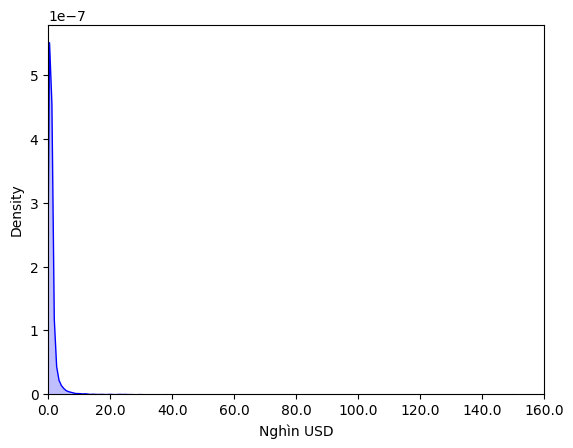

In [116]:
sns.kdeplot(df_tourist['price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**5)):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('Nghìn USD');

''

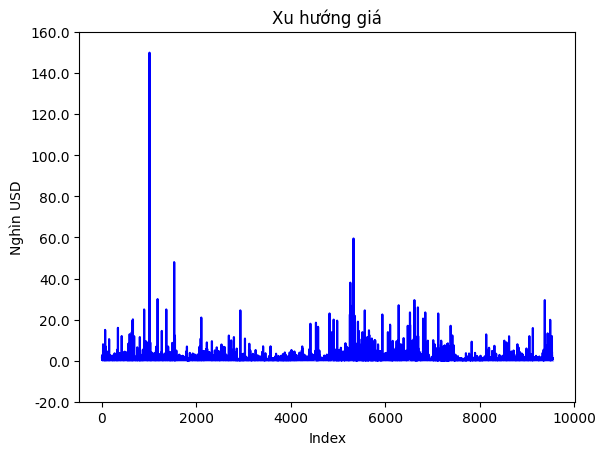

In [117]:
sns.lineplot(data=df_tourist['price'], color='blue')
plt.fill_between(df_tourist.index, df_tourist['price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**5)):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('Nghìn USD')
;


''

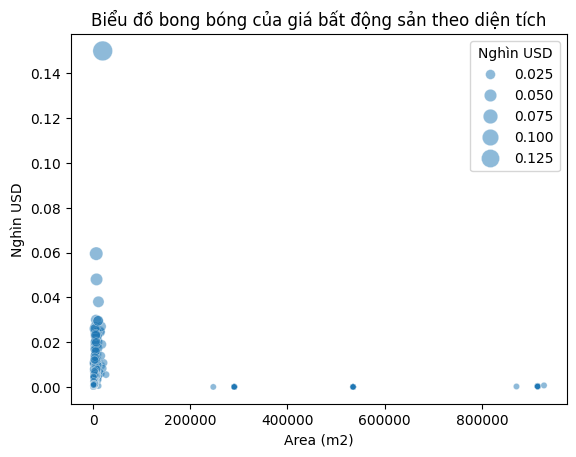

In [118]:
price_billion = df_tourist['price'].apply(lambda x: x/(10**9))

sns.scatterplot(x=df_tourist.house_size, y=price_billion, size=price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel('Nghìn USD')

plt.legend(title='Nghìn USD', fontsize='10')

;

In [119]:
# Huấn luyện mô hình
X = df_tourist[['house_size', 'bed', 'bath']]
Y = df_tourist[['price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
price_predictions = model.predict(X_test)

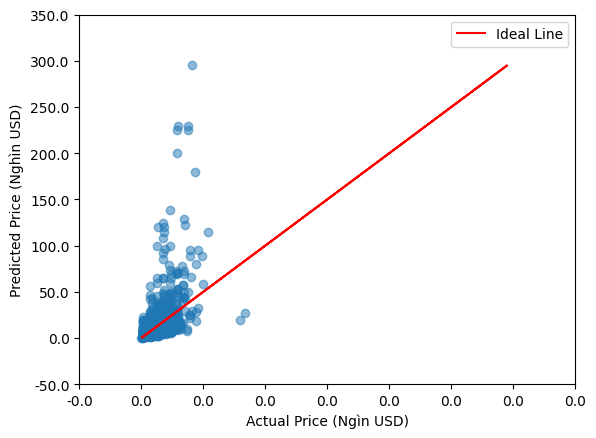

In [120]:
# Visualize khả năng dự đoán
plt.scatter(x=price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**4)):,.1f}' for tick in yticks]);

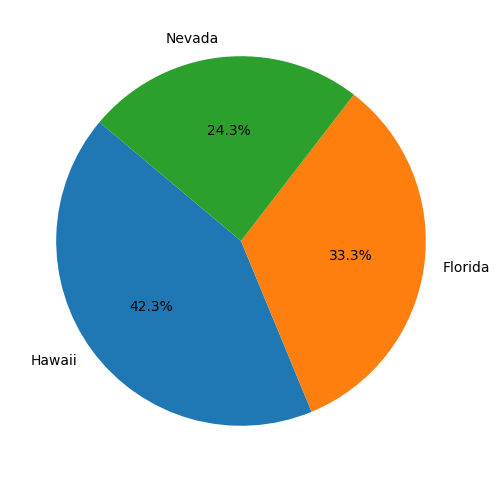

In [121]:
real_estate_counts = df_tourist['state'].value_counts()
plt.figure(figsize = (12,6) )
plt.pie(real_estate_counts, labels = real_estate_counts.index, autopct = '%1.1f%%', startangle = 140);